# **PRML Minor Project**

**Topic - 'Mask' Or 'No Mask' Detection**                  
**Team Members**                                
*   Mayank Singh Rajput (B19CSE054)   
*   Mohit Ahirwar (B19CSE055)




Importing necessary modules

In [ ]:
import cv2,os
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve

In [ ]:
# Giving path
path ='dataset'
classes = os.listdir(path)
img_size = 100
data=[]
target=[]

In [ ]:
# Creating labels
labels=[i for i in range(len(classes))]
label_dict=dict(zip(classes,labels))

print("Label Dictionary :",label_dict)
print(30*'--')
print("Categories :",classes)
print(30*'--')
print("Labels :",labels)
print(30*'--')

Label Dictionary : {'masked': 0, 'unmasked': 1}
------------------------------------------------------------
Categories : ['masked', 'unmasked']
------------------------------------------------------------
Labels : [0, 1]
------------------------------------------------------------


Image Preprocessing

In [ ]:
for category in classes:
    folder_path=os.path.join(path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)   #Coverting the image into gray scale
        resized=cv2.resize(gray,(img_size,img_size))    #resizing the gray scale
        data.append(resized)    #appending the image and the label(categorized) into the list (dataset)
        target.append(label_dict[category])

In [ ]:
#scaling the image
data=np.array(data)/255.0
#Reshaping it
X = np.reshape(data,(data.shape[0],img_size,img_size,1))
y = np.array(target)
# Using to_categorical from np.utils
y_cat = np_utils.to_categorical(target)

#***Classifier 1 - CNN***

In [ ]:
#Building CNN Model
model=Sequential()

#The first CNN layer

#Convolution layer of a kernel size 200
model.add(Conv2D(200,(3,3),input_shape = X.shape[1:]))
#Relu layer
model.add(Activation('relu'))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer

#Convolution layer of a kernel size 100
model.add(Conv2D(100,(3,3)))
#Relu layer
model.add(Activation('relu'))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())

#Performing Dropout to avoid overfitting
model.add(Dropout(0.5))

#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))

#Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       2000      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0

In [ ]:
# Splitting test and train for CNN model building
train_X,test_X,train_y,test_y = train_test_split(X,y_cat,test_size=0.5)

In [ ]:
CNN = model.fit(train_X,train_y,epochs = 15,validation_split=0.2)

Epoch 1/15
63/63 [==============================] - 77s 1s/step - loss: 0.5841 - accuracy: 0.6672 - val_loss: 0.3320 - val_accuracy: 0.9780
Epoch 2/15
63/63 [==============================] - 75s 1s/step - loss: 0.3439 - accuracy: 0.9669 - val_loss: 0.3299 - val_accuracy: 0.9321
Epoch 3/15
63/63 [==============================] - 75s 1s/step - loss: 0.3147 - accuracy: 0.9638 - val_loss: 0.2832 - val_accuracy: 0.9880
Epoch 4/15
63/63 [==============================] - 70s 1s/step - loss: 0.2781 - accuracy: 0.9828 - val_loss: 0.2578 - val_accuracy: 0.9860
Epoch 5/15
63/63 [==============================] - 71s 1s/step - loss: 0.2079 - accuracy: 0.9656 - val_loss: 0.0417 - val_accuracy: 0.9880
Epoch 6/15
63/63 [==============================] - 71s 1s/step - loss: 0.1010 - accuracy: 0.9657 - val_loss: 0.2105 - val_accuracy: 0.9062
Epoch 7/15
63/63 [==============================] - 73s 1s/step - loss: 0.0672 - accuracy: 0.9771 - val_loss: 0.1129 - val_accuracy: 0.9541
Epoch 8/15
63/63 [==

          -----------Accuracy Graph-----------   


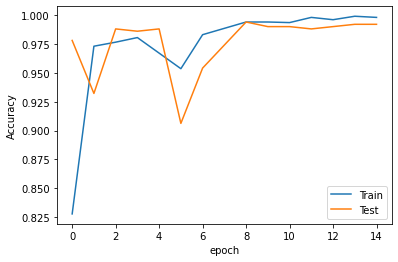

In [ ]:
#To visualize the training process 
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
print("          -----------Accuracy Graph-----------   ")
plt.show()

          -----------Loss Graph-----------   


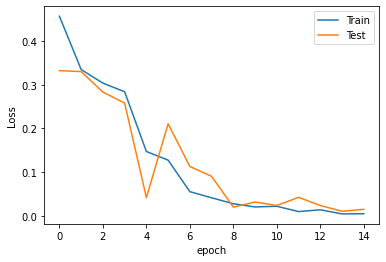

In [ ]:
plt.plot(CNN.history['loss'])
plt.plot(CNN.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
print("          -----------Loss Graph-----------   ")
plt.show()

In [ ]:
accuracy = model.evaluate(x=test_X,y=test_y,batch_size=32)
print("Accuracy - CNN : ",accuracy[1]*100,"%")

79/79 [==============================] - 23s 287ms/step - loss: 0.0449 - accuracy: 0.9884
Accuracy - CNN :  98.84231686592102 %


In [ ]:
prediction = model.predict(test_X)
prediction = (prediction > 0.5)

In [ ]:
accuracy_score(test_y,prediction)*100

98.84231536926148

In [ ]:
#Checking performance our model with classification report
import sklearn.metrics as metrics
print(30*'--')
print(classification_report(test_y, prediction))
print(30*'--')

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1253
           1       0.99      0.99      0.99      1252

   micro avg       0.99      0.99      0.99      2505
   macro avg       0.99      0.99      0.99      2505
weighted avg       0.99      0.99      0.99      2505
 samples avg       0.99      0.99      0.99      2505

------------------------------------------------------------


In [ ]:
train_X.shape

(2504, 100, 100, 1)

In [ ]:
test_X.shape

(2505, 100, 100, 1)

In [ ]:
# Generating test and train files for building rest of the models
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.5)

In [ ]:
train_X.shape

(2504, 100, 100, 1)

In [ ]:
train_X = train_X.reshape(2504,100*100)
test_X = test_X.reshape(2505,100*100)

#***Classifier 2 - SVM (linear + gaussian)***

In [ ]:
#Create a svm Classifier
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(train_X,train_y)

#Predict the response for test dataset
pred_y_svm = clf.predict(test_X)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy
print(30*'--')
print("Accuracy - SVM (Linear):",metrics.accuracy_score(test_y, pred_y_svm)*100,"%")
print(30*'--')

------------------------------------------------------------
Accuracy - SVM (Linear): 93.0938123752495 %
------------------------------------------------------------


In [ ]:
# SVM - gaussian Kernel

In [ ]:
clf1 = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf1.fit(train_X,train_y)

#Predict the response for test dataset
pred_y_svm_gaussian = clf1.predict(test_X)

In [ ]:
# Model Accuracy
print(30*'--')
print("Accuracy - SVM (Gaussian):",metrics.accuracy_score(test_y, pred_y_svm_gaussian)*100,"%")
print(30*'--')

------------------------------------------------------------
Accuracy - SVM (Gaussian): 98.16367265469061 %
------------------------------------------------------------


------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1250
           1       0.98      0.98      0.98      1255

    accuracy                           0.98      2505
   macro avg       0.98      0.98      0.98      2505
weighted avg       0.98      0.98      0.98      2505

------------------------------------------------------------
PLotting ROC for SVM (Gaussian) :



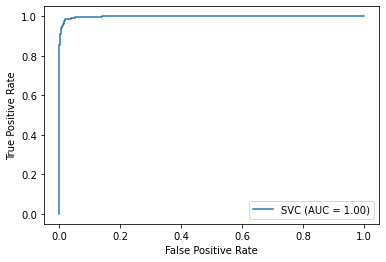

------------------------------------------------------------


In [ ]:
#Checking performance our model with classification report
print(30*'--')
print(classification_report(test_y, pred_y_svm_gaussian))
print(30*'--')
#Plotting ROC curve
print("PLotting ROC for SVM (Gaussian) :\n")
metrics.plot_roc_curve(clf1, test_X, test_y)  
plt.show() 
print(30*'--')

#***Classifier 3 - KNN***

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

#Train the model using the training sets
knn.fit(train_X,train_y)

#Predict the response for test dataset
y_pred_knn = knn.predict(test_X)

In [ ]:
# Model Accuracy
print(30*'--')
print("Accuracy - KNN :",metrics.accuracy_score(test_y, y_pred_knn)*100,"%")
print(30*'--')

------------------------------------------------------------
Accuracy - KNN : 93.01397205588823 %
------------------------------------------------------------


------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1250
           1       0.89      0.99      0.93      1255

    accuracy                           0.93      2505
   macro avg       0.94      0.93      0.93      2505
weighted avg       0.94      0.93      0.93      2505

------------------------------------------------------------
PLotting ROC for KNN :



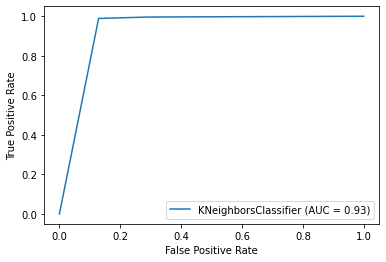

------------------------------------------------------------


In [ ]:
#Checking performance our model with classification report
print(30*'--')
print(classification_report(test_y, y_pred_knn))
print(30*'--')
#Plotting ROC curve
print("PLotting ROC for KNN :\n")
metrics.plot_roc_curve(knn, test_X, test_y)  
plt.show() 
print(30*'--')

#***Classifier 4 - Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(max_iter = 3000).fit(train_X,train_y)
y_pred_lr = clf_lr.predict(test_X)

In [ ]:
clf_lr.score(train_X,train_y)

1.0

In [ ]:
# Model Accuracy
print(30*'--')
print("Accuracy - Logistic Regression :",metrics.accuracy_score(test_y, y_pred_lr)*100,"%")
print(30*'--')

------------------------------------------------------------
Accuracy - Logistic Regression : 94.41117764471058 %
------------------------------------------------------------


------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1250
           1       0.93      0.97      0.95      1255

    accuracy                           0.94      2505
   macro avg       0.94      0.94      0.94      2505
weighted avg       0.94      0.94      0.94      2505

------------------------------------------------------------
PLotting ROC for Logistic Regression :



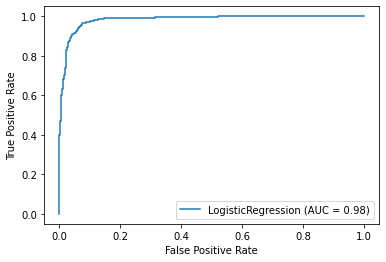

------------------------------------------------------------


In [ ]:
#Checking performance our model with classification report
print(30*'--')
print(classification_report(test_y, y_pred_lr))
print(30*'--')
#Plotting ROC curve
print("PLotting ROC for Logistic Regression :\n")
metrics.plot_roc_curve(clf_lr, test_X, test_y)  
plt.show() 
print(30*'--')